<a href="https://colab.research.google.com/github/Leonardogamu/mcd---aprendizaje_automatico_2025/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 3**
## ○ Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos


In [38]:
import pandas as pd
data=pd.read_csv('/content/health_lifestyle_dataset.csv')
data #ya cargamos nuestra informacion
data['gender_bin'] = data['gender'].map({'Male': 0, 'Female': 1})
data['gender'] = data['gender_bin']
data.drop('gender_bin', axis=1, inplace=True) #recordamos la modificacion hecha en la tarea anterior

data

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,0,20.5000,4198,3.9000,3.4000,1602,0,0,97,161,111,240,0,0
1,2,69,1,33.3000,14359,9.0000,4.7000,2346,0,1,68,116,65,207,0,0
2,3,46,0,31.6000,1817,6.6000,4.2000,1643,0,1,90,123,99,296,0,0
3,4,32,1,38.2000,15772,3.6000,2.0000,2460,0,0,71,165,95,175,0,0
4,5,60,1,33.6000,6037,3.8000,4.0000,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,0,33.1000,4726,3.9000,2.0000,3118,0,1,56,105,76,282,0,0
99996,99997,22,0,35.1000,11554,4.5000,3.1000,1967,0,0,51,149,77,192,0,0
99997,99998,37,0,18.9000,3924,3.8000,1.0000,2328,0,0,69,92,117,218,0,0
99998,99999,72,1,27.8000,16110,5.6000,0.8000,3093,0,0,93,164,72,188,0,0


<Axes: >

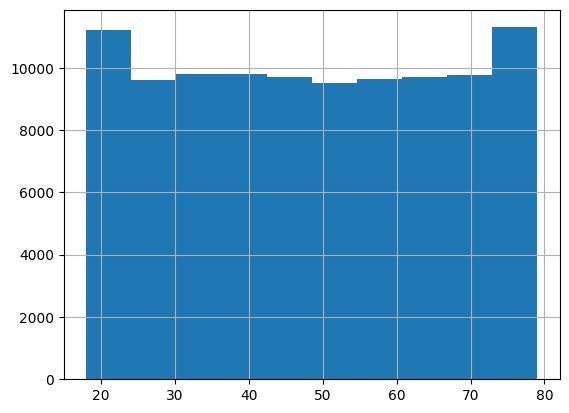

In [39]:
#Vamos a revisar por tipo de variable
#Las parametricas serian aquellas continuas
#Las No Paramétricas serian aquellas categóricas/binarias
data_sospecha_Siparametrica = data[["age","bmi","daily_steps","sleep_hours","water_intake_l","calories_consumed",
                                  "resting_hr","systolic_bp","diastolic_bp","cholesterol"]]
data_sospecha_Noparametrica = data[["id","gender","smoker","alcohol","family_history","disease_risk"]]

#Entonces, de aquellas que si se sospecha, son Paramétricas, se generaran los histogramas correspondientes
#con ello se vera si la informacion toma forma de una normal (Campana de Gauss)
import matplotlib.pyplot as plt
import seaborn as sns

display(data_sospecha_Siparametrica["age"].hist())
#De primera podemos ver que su comportamiento no es el de una normal, por lo cual podria ser un dato no paramétrico

<Axes: >

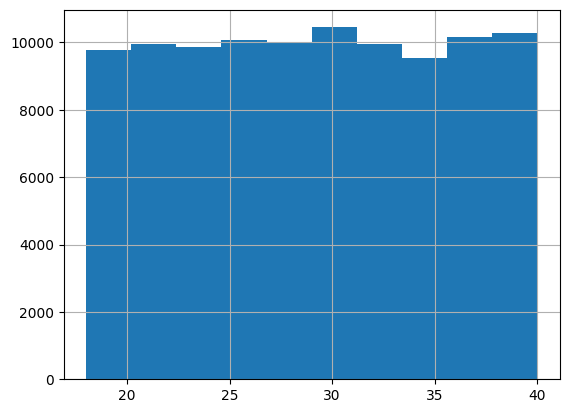

In [41]:
display(data_sospecha_Siparametrica["bmi"].hist())
#Este histograma presenta tambien un comportamiento muy distinto a una campana de Gauus, por cual no es paramétrico

<Axes: >

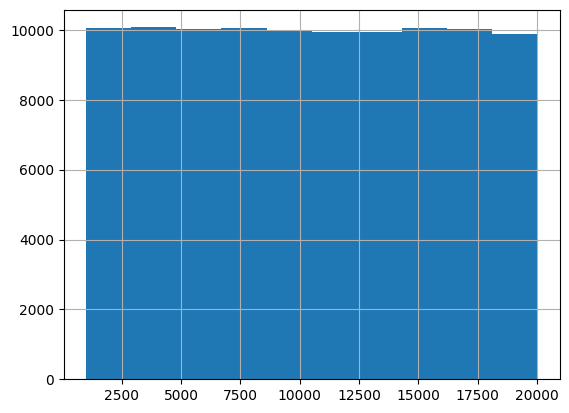

In [ ]:
display(data_sospecha_Siparametrica["daily_steps"].hist())
#Tampoco presenta forma de distribucion Normal, no es paramétrico

<Axes: >

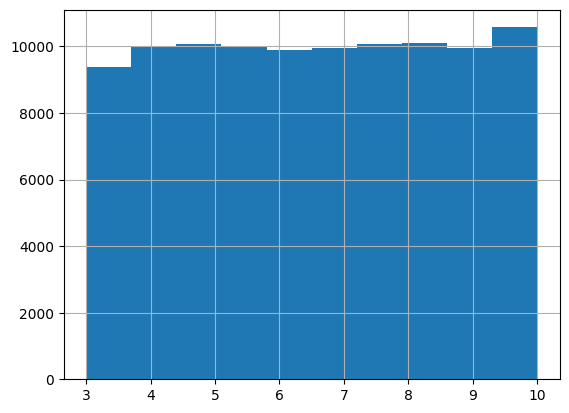

In [ ]:
display(data_sospecha_Siparametrica["sleep_hours"].hist())
#Este presenta un comportamiento distinto a los anteriores, pero tambien distinto a una normal,
#Por ende tampoco es paramétrico.

<Axes: >

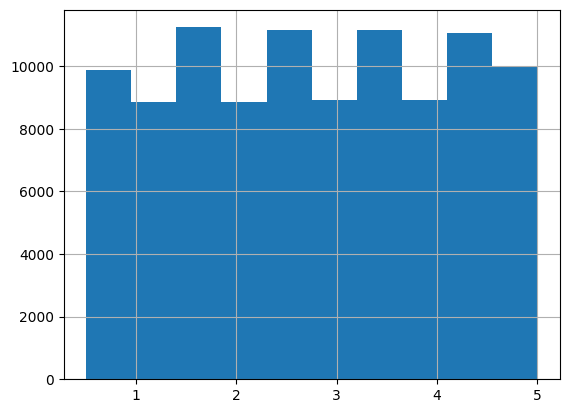

In [ ]:
display(data_sospecha_Siparametrica["water_intake_l"].hist())
#Este Histograma tiene una forma completa y evidentemente diferente al de una campana de Gauss
#Por lo tanto, tampoco es paramétrico.

<Axes: >

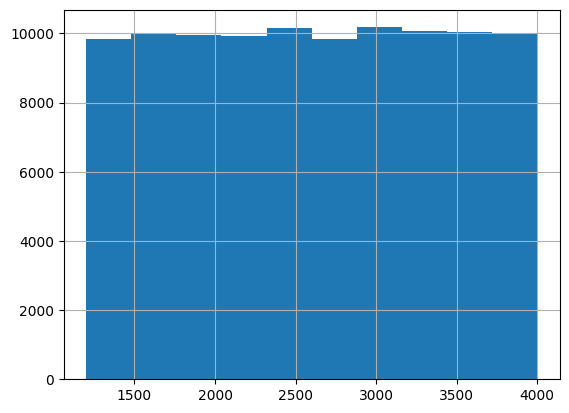

In [ ]:
display(data_sospecha_Siparametrica["calories_consumed"].hist())
#Tampoco es paramétrico

<Axes: >

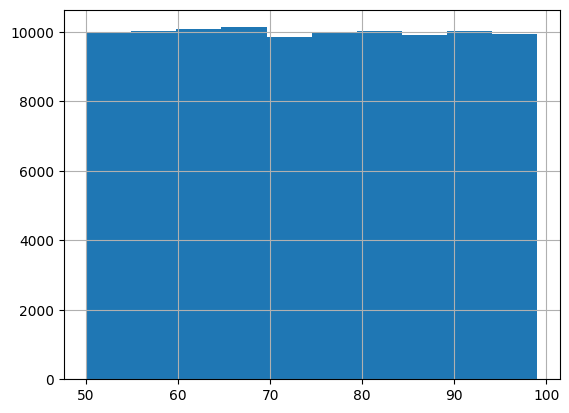

In [ ]:
display(data_sospecha_Siparametrica["resting_hr"].hist())
#Tampoco se observa un comportamiento como el de una Normal,
#Entonces tampoco es Paramétrico

<Axes: >

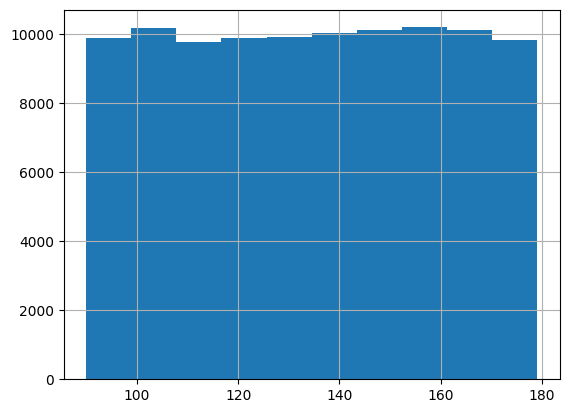

In [ ]:
display(data_sospecha_Siparametrica["systolic_bp"].hist())
#Mismo caso que los anteriores, por lo que no es paramétrico

<Axes: >

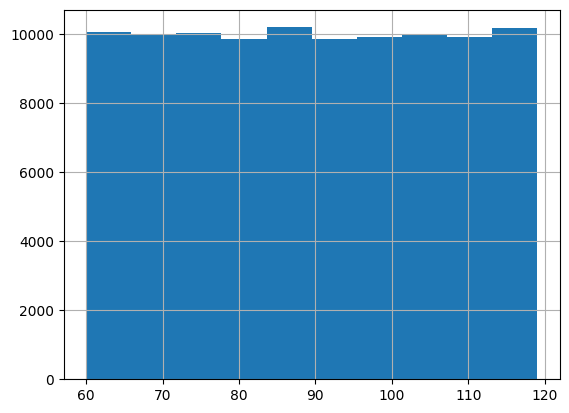

In [ ]:
display(data_sospecha_Siparametrica["diastolic_bp"].hist())
#Mismo caso que los anteriores, por lo que no es paramétrico

<Axes: >

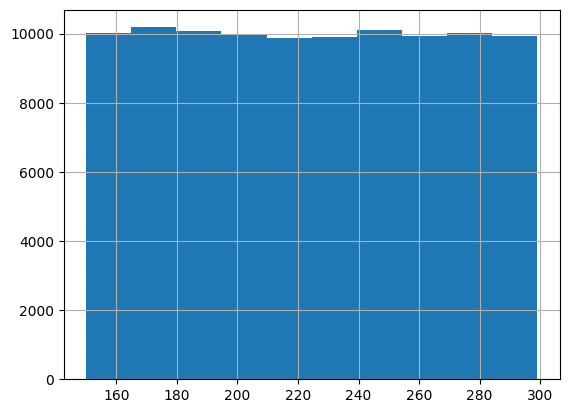

In [ ]:
display(data_sospecha_Siparametrica["cholesterol"].hist())
#Mismo caso que los anteriores, por lo que no es paramétrico

Se puede observar que aquellas variables con valores continuos, ninguno cumple con indicios de normalidad, por lo que se puede decir que no son paramétricos los datos presentados.

Estoy un poco desilusionado :(

Pero vamos a terminar de confirmar con una prueba de normalidad

In [42]:
from scipy.stats import shapiro

for col in data_sospecha_Siparametrica.columns:
  stat, p = shapiro(data_sospecha_Siparametrica[col])
  if p > 0.05:
    print(f"{col} SI es paramétrica")
  else:
    print(f"{col} NO es paramétrica")


age NO es paramétrica
bmi NO es paramétrica
daily_steps NO es paramétrica
sleep_hours NO es paramétrica
water_intake_l NO es paramétrica
calories_consumed NO es paramétrica
resting_hr NO es paramétrica
systolic_bp NO es paramétrica
diastolic_bp NO es paramétrica
cholesterol NO es paramétrica


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Terminamos de confirmar, que las variables no presentan normalidad alguna, entonces podemos decir que no son paramétricas, las variables de las que se sospechaba.

## ○ Calcula estadísticos descriptivos básicos para tus datos



In [43]:
#calculamos la media de todas las columnas (excepto id)
data.drop(columns=["id"]).mean()

,0
age,48.5260
gender,0.4987
bmi,29.0248
daily_steps,10479.8703
sleep_hours,6.4918
water_intake_l,2.7515
calories_consumed,2603.3412
smoker,0.2009
alcohol,0.3000
resting_hr,74.4574


In [44]:
#Ahora la mediana
data.drop(columns=["id"]).median()

,0
age,48.0000
gender,0.0000
bmi,29.0000
daily_steps,10468.0000
sleep_hours,6.5000
water_intake_l,2.8000
calories_consumed,2603.0000
smoker,0.0000
alcohol,0.0000
resting_hr,74.0000


In [45]:
#La moda
import statistics
data.drop(columns=["id"]).mode()
#Si observamos, la columna de daily_steps presenta 4 valores de moda, mientras el resto solo 1

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,71.0000,0.0000,20.1000,12991,8.5000,1.5000,1518.0000,0.0000,0.0000,65.0000,107.0000,88.0000,164.0000,0.0000,0.0000
1,NaN,NaN,NaN,13061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,13601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,19781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#Varianza
pd.set_option('display.float_format', '{:.4f}'.format) #esto para evitar la notacion cientifica
data.drop(columns=["id"]).var()


,0
age,319.9365
gender,0.2500
bmi,40.3564
daily_steps,30070223.8609
sleep_hours,4.0882
water_intake_l,1.6831
calories_consumed,651714.8242
smoker,0.1606
alcohol,0.2100
resting_hr,208.0436


In [47]:
#Desviacion Estándar
import numpy as np
np.sqrt(data.drop(columns=["id"]).var())#solo le sacamos la raiz a las varianzas que obtuvimos

,0
age,17.8868
gender,0.5000
bmi,6.3527
daily_steps,5483.6324
sleep_hours,2.0219
water_intake_l,1.2973
calories_consumed,807.2886
smoker,0.4007
alcohol,0.4583
resting_hr,14.4237


## ○ Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma

In [49]:
correlacion_data = data.drop(columns=["id"]).corr()
correlacion_data

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
age,1.0000,-0.0001,0.0012,0.0048,0.0004,-0.0056,-0.0027,-0.0025,-0.0009,0.0015,0.0008,0.0002,0.0007,0.0027,0.0017
gender,-0.0001,1.0000,0.0004,-0.0012,0.0031,0.0032,0.0006,0.0029,-0.0046,0.0017,-0.0026,-0.0005,-0.0012,-0.0054,0.0020
bmi,0.0012,0.0004,1.0000,0.0018,0.0009,-0.0036,0.0023,-0.0034,0.0021,-0.0063,0.0008,-0.0031,0.0020,0.0023,0.0036
daily_steps,0.0048,-0.0012,0.0018,1.0000,-0.0012,-0.0009,0.0003,0.0005,0.0035,0.0044,-0.0020,-0.0035,0.0001,0.0024,-0.0034
sleep_hours,0.0004,0.0031,0.0009,-0.0012,1.0000,0.0015,0.0012,0.0011,-0.0063,0.0026,0.0002,0.0022,0.0031,-0.0019,0.0026
water_intake_l,-0.0056,0.0032,-0.0036,-0.0009,0.0015,1.0000,-0.0076,0.0016,0.0037,0.0009,-0.0032,-0.0013,0.0026,0.0020,-0.0019
calories_consumed,-0.0027,0.0006,0.0023,0.0003,0.0012,-0.0076,1.0000,0.0022,0.0056,0.0009,-0.0002,0.0043,-0.0052,-0.0048,0.0027
smoker,-0.0025,0.0029,-0.0034,0.0005,0.0011,0.0016,0.0022,1.0000,0.0025,-0.0014,0.0037,-0.0073,0.0010,0.0027,0.0011
alcohol,-0.0009,-0.0046,0.0021,0.0035,-0.0063,0.0037,0.0056,0.0025,1.0000,0.0046,-0.0046,0.0035,-0.0036,-0.0030,0.0005
resting_hr,0.0015,0.0017,-0.0063,0.0044,0.0026,0.0009,0.0009,-0.0014,0.0046,1.0000,0.0008,-0.0018,-0.0017,0.0001,0.0054


Lo primero que puedo notar, es que la correlación entre la 'age' y 'disease_risk' es una positiva, lo cual nos dice que la edad si tiene un nivel de relacion con el riesgo de enfermedad (algo que considero muy obvio por lógica).

Pero tambien vemos que Indice de Masa Corporal 'bmi' cuenta con una relacion positiva principalmente con 'alcohol', 'cholesterol' 'family_history', indicandonos tambien que el habito de consumir alcohol, el aumento en la cantidad de colesterol en el cuerpo y el historial familiar de enfermedades estan asociados.

Tambien resaltando que 'diastolic_bp' y 'systolic_bp' cuentan con una correlacion positiva con 'sleep_hours', esto tiene un respaldo cientifico, pues se ha demostrado que entre uno mas cuide su ciclo del sueño, cuenta con una mejor presion arterial.

Notamos como predominan las correlaciones negativas, por lo que preferi resaltar las mas altas de las positivas que pude apreciar o que mas sentido me hicieron.

Ademas de aclarar que aunque las correlaciones sean positivas, todas las positivas no estan cercanas al 1, lo cual indicaria una correlacion si positiva, pero debil.

## ○ Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación

In [50]:
#Seleccionare la ultima correlacion positiva que escribi en el punto anterior:
#La correlacion entre 'diastolic_bp' y 'sleep_hours'

#H0: No hay correlación entre la presión arterial diastólica y el numero de horas de sueño de las personas.
#H1: Si hay correlación entre la presión arterial diastólica y el numero de horas de sueño de las personas.
#Consideramos alpha del 0.05
import scipy.stats as stats
subconjunto_prueba_data = data[['diastolic_bp', 'sleep_hours']].dropna()

test_correlación_pearson = stats.pearsonr(subconjunto_prueba_data['diastolic_bp'], subconjunto_prueba_data['sleep_hours'])
print(test_correlación_pearson)
print(f"El p-valor es {test_correlación_pearson[1]}")

#pero tenemos que alpha es 0.05
#entonces, rechazo H0 si p valor < alpha
#Tendriamos que 0.4781 < 0.05, lo cual no se cumple
#Entonces NO Rechazo H0
#Por lo tanto, No hay evidencia suficiente para afirmar que hay una correlación entre las 2 variables


PearsonRResult(statistic=np.float64(0.002243076878010099), pvalue=np.float64(0.47812888818830906))
El p-valor es 0.47812888818830906


La prueba de hipotesis refuerza lo mencionado en la seccion anterior, que aunque la correlación sea positiva, esta es muy debil, vaya no es una correlación lo suficientemente significativa (almenos en nuestro conjunto de datos)

## ○ Presenta tus resultados gráficamente

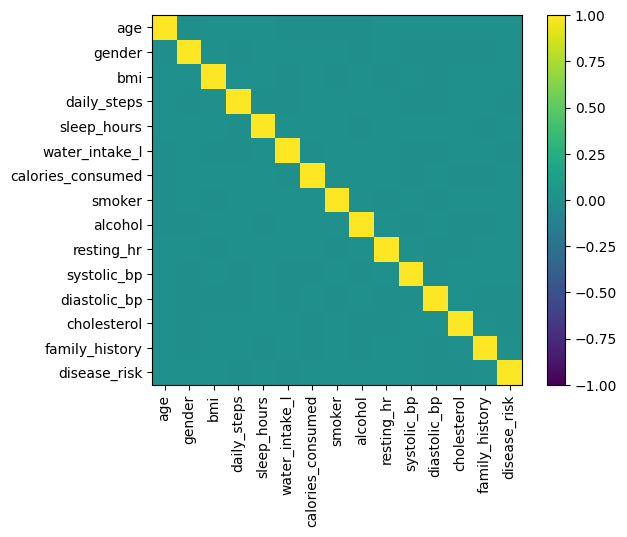

In [51]:
plt.figure()
plt.imshow(correlacion_data)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], labels = data.drop(columns=["id"]).columns,rotation=90)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], labels = data.drop(columns=["id"]).columns)

plt.clim(vmin = -1, vmax =1)
plt.colorbar()
plt.show()

Si observamos bien el grafico, ocurre lo que habia mencionado en las secciones anteriores, que aunque existen correlaciónes tanto negativas como positivas, se aprecia que no son muy fuertes ninguna de ellas, son correlaciónes debiles.

Lo cual me preocupa, pues podria indicar una dificultad para analizar relaciones entre variables, pues podrian indicar que el dataframe que elegi contiene datos que miden cosas muy distintas (aun y que en secciones anteriores explique que las horas de sueño si cuentan con relacion con la presion arterial, pues esto ya cuenta con estudios que lo respaldan)